<a href="https://colab.research.google.com/github/tlerksuthirat/lab_management/blob/main/Motorized_Upright_Microscope_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
#Replace with sheet ID
instrument_url = 'https://docs.google.com/spreadsheets/d/[sheet ID]/edit?usp=sharing'

sheet_id = instrument_url .split('/')[-2]  # Extract sheet ID from URL
sheet = gc.open_by_key(sheet_id)

In [71]:
sheet

<Spreadsheet 'Upright microscope-log book' id:1WBZS1PXpkSTeA4xpV0PVBvmPP5-ZYCelRcl3WKvS_TM>

In [72]:
#Get a list of all worksheets
worksheet_list = sheet.worksheets()

#Print the titles of all worksheets
for worksheet in worksheet_list:
    print(worksheet.title)

2025
2024
Productivity
2023
2022
2021
User list
Status


In [73]:
#Choose a specific worksheet if needed (default is the first sheet) - it is the index; the first starts with 0
worksheet = sheet.get_worksheet(0)

In [74]:
#Get all values from the worksheet
data = worksheet.get_all_values()

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import csv
with open('usage.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

df = pd.read_csv('usage.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Date of use (MM/DD/YY),Start (00:00-24:00),End (00:00-24:00),Duration (hr),Technique,Condition,User name,Note,Unnamed: 8
0,Motorized Upright Microscope has executed on 2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1-Jan-2025,0:00,0:00,0:00,IF or BF,Okay,Tassanee Lerksuthirat,Demo how to fill in the log book,NaN
2,7-Jan-2025,10:00,14:45,4:45,-,OK,Wilasinee Konsue,Image processing,NaN
3,8-Jan-2025,13:00,15:00,2:00,-,OK,Wilasinee Konsue,Image processing,NaN
4,14-Jan-2025,10:00,14:30,4:30,-,OK,Wilasinee Konsue,Image processing,NaN


In [77]:
print(df.columns)

Index(['Date of use (MM/DD/YY)', 'Start (00:00-24:00)', 'End (00:00-24:00)',
       'Duration (hr)', 'Technique', 'Condition', 'User name', 'Note',
       'Unnamed: 8'],
      dtype='object')


In [78]:
# Remove the first row (index 0)
df = df.iloc[1:].copy()

df.head()

,Date of use (MM/DD/YY),Start (00:00-24:00),End (00:00-24:00),Duration (hr),Technique,Condition,User name,Note,Unnamed: 8
1,1-Jan-2025,0:00,0:00,0:00,IF or BF,Okay,Tassanee Lerksuthirat,Demo how to fill in the log book,NaN
2,7-Jan-2025,10:00,14:45,4:45,-,OK,Wilasinee Konsue,Image processing,NaN
3,8-Jan-2025,13:00,15:00,2:00,-,OK,Wilasinee Konsue,Image processing,NaN
4,14-Jan-2025,10:00,14:30,4:30,-,OK,Wilasinee Konsue,Image processing,NaN
5,16-Jan-2025,10:00,14:40,4:40,BF,OK,Wilasinee Konsue,NaN,NaN


In [79]:
df.tail()

,Date of use (MM/DD/YY),Start (00:00-24:00),End (00:00-24:00),Duration (hr),Technique,Condition,User name,Note,Unnamed: 8
997,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
999,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,161:55:00,NaN,NaN,NaN,NaN,NaN


In [82]:
# Replace 'Your Specific Column' with the actual name of your column
column_to_check = 'Date of use (MM/DD/YY)'
df_cleaned = df.dropna(subset=[column_to_check])

df_cleaned.head()

,Date of use (MM/DD/YY),Start (00:00-24:00),End (00:00-24:00),Duration (hr),Technique,Condition,User name,Note,Unnamed: 8
1,1-Jan-2025,0:00,0:00,0:00,IF or BF,Okay,Tassanee Lerksuthirat,Demo how to fill in the log book,NaN
2,7-Jan-2025,10:00,14:45,4:45,-,OK,Wilasinee Konsue,Image processing,NaN
3,8-Jan-2025,13:00,15:00,2:00,-,OK,Wilasinee Konsue,Image processing,NaN
4,14-Jan-2025,10:00,14:30,4:30,-,OK,Wilasinee Konsue,Image processing,NaN
5,16-Jan-2025,10:00,14:40,4:40,BF,OK,Wilasinee Konsue,NaN,NaN


In [83]:
df_cleaned.tail()

,Date of use (MM/DD/YY),Start (00:00-24:00),End (00:00-24:00),Duration (hr),Technique,Condition,User name,Note,Unnamed: 8
55,21-May-2025,13:00,16:30,3:30,IF,Okay,Sathida Liekwannacharoen,NaN,NaN
56,22-May-2025,9:00,10:30,1:30,Image processing,Okay,Tassanee Lerksuthirat,The errors were fixed. We found that we did no...,NaN
57,22-May-2025,12:30,16:30,4:00,IF,Okay,Sathida Liekwannacharoen,NaN,NaN
58,23-May-2025,9:00,11:30,2:30,IF,Okay,Pawarit Innachai,NaN,NaN
59,23-May-2025,12:30,14:00,1:30,IF,Olay,Sathida Liekwannacharoen,Cannot touch-screen the display.,Noted: restart is okay


In [91]:
#Create the function to calculate time duration

def time_string_to_seconds_flexible(row):
    time_str = row['Duration (hr)']
    index = row.name # Get the index of the current row

    if pd.isna(time_str) or time_str == '':
        return 0  # Handle missing or empty values

    time_str_cleaned = time_str.lstrip(', ').strip()

    try:
        parts = time_str_cleaned.split(':')

        if len(parts) == 2:
            # Assuming H:M format
            h, m = map(int, parts)
            s = 0 # Seconds are 0 if only H:M is provided
        elif len(parts) == 3:
            # Assuming H:M:S format
            h, m, s = map(int, parts)
        else:
            # Handle cases with unexpected number of parts
            print(f"Warning: Unexpected time format '{time_str}' at index {index}. Returning 0.")
            return 0

        total_seconds = h * 3600 + m * 60 + s
        return total_seconds

    except ValueError:
        # Handle cases where parts could not be converted to integers
        print(f"Warning: Could not convert time parts to integers for '{time_str}' at index {index}. Returning 0.")
        return 0
    except Exception as e:
        # Catch any other unexpected errors
        print(f"An unexpected error occurred processing '{time_str}' at index {index}: {e}. Returning 0.")
        return 0


# Apply the function row by row using iterrows()
# Create a list to store the results
total_seconds_list = []
for index, row in df_cleaned.iterrows():
    total_seconds_list.append(time_string_to_seconds_flexible(row))

# Assign the results back to the DataFrame
df_cleaned['Total Seconds'] = total_seconds_list

# Calculate 'Total Hours' and plot as before
df_cleaned['Total Hours'] = df_cleaned['Total Seconds'] / 3600

<ipython-input-91-3abe4ba1e30a>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Seconds'] = total_seconds_list
<ipython-input-91-3abe4ba1e30a>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Hours'] = df_cleaned['Total Seconds'] / 3600


Total Usage Time Across All Users: 161.92 hours


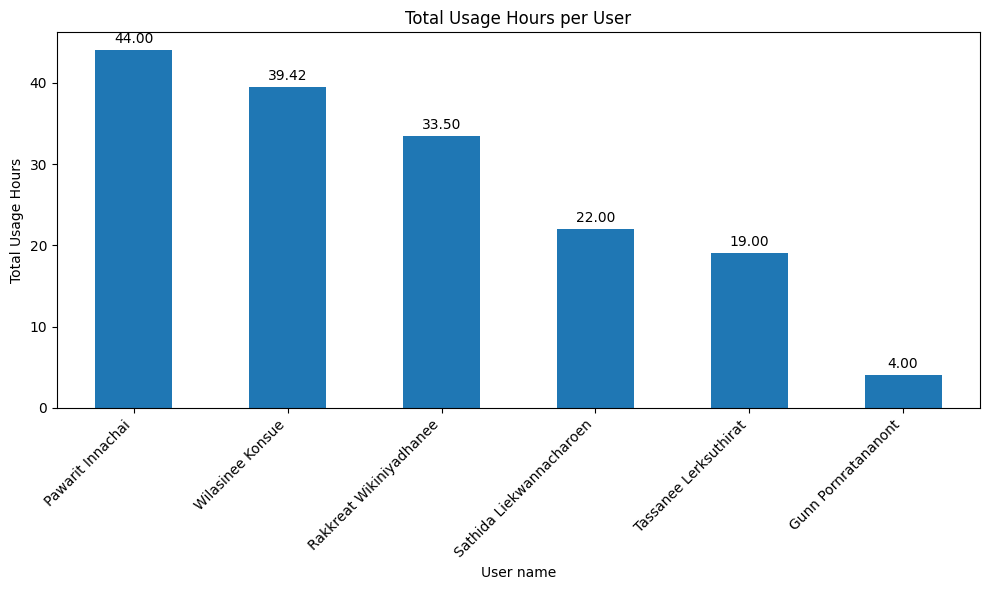

In [92]:
# Group by 'User name' and sum the 'Total Hours'
user_usage_hours = df_cleaned.groupby('User name')['Total Hours'].sum()
user_usage_hours = user_usage_hours.sort_values(ascending=False)
total_usage_overall = df_cleaned['Total Hours'].sum()

# Print the total usage time
print(f"Total Usage Time Across All Users: {total_usage_overall:.2f} hours")

# Create the bar plot
plt.figure(figsize=(10, 6)) # Adjust figure size if needed
ax = user_usage_hours.plot(kind='bar') # Get the axes object
#user_usage_hours.plot(kind='bar')

# Add labels and title
plt.xlabel('User name')
plt.ylabel('Total Usage Hours')
plt.title('Total Usage Hours per User')

# Rotate x-axis labels for better readability if user names are long
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Iterate over the bars in the plot
for i, v in enumerate(user_usage_hours):
    # v is the height of the bar (Total Hours)
    # i is the index of the bar (position on the x-axis)

    # Add the text label
    ax.text(
        i,        # x-coordinate: the position of the bar on the x-axis
        v + 0.5,  # y-coordinate: slightly above the top of the bar (adjust 0.5 as needed)
        f"{v:.2f}", # The text to display (formatted to 2 decimal places)
        ha='center', # Horizontal alignment: center the text above the bar
        va='bottom'  # Vertical alignment: align the bottom of the text to the specified y-coordinate
    )

# Show the plot
plt.show()